In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных

In [13]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [14]:
data = pd.read_excel('data/data_ford_price.xlsx') 

FileNotFoundError: [Errno 2] No such file or directory: 'data_ford_price.xlsx'

In [6]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

In [7]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Чтобы этой ошибки не возникало, необходимо закодировать данные.

В разделе **EDA-3** вы познакомились с такими методами кодирования, как:

- порядковое кодирование;
- двоичное кодирование;
- однократное кодирование.

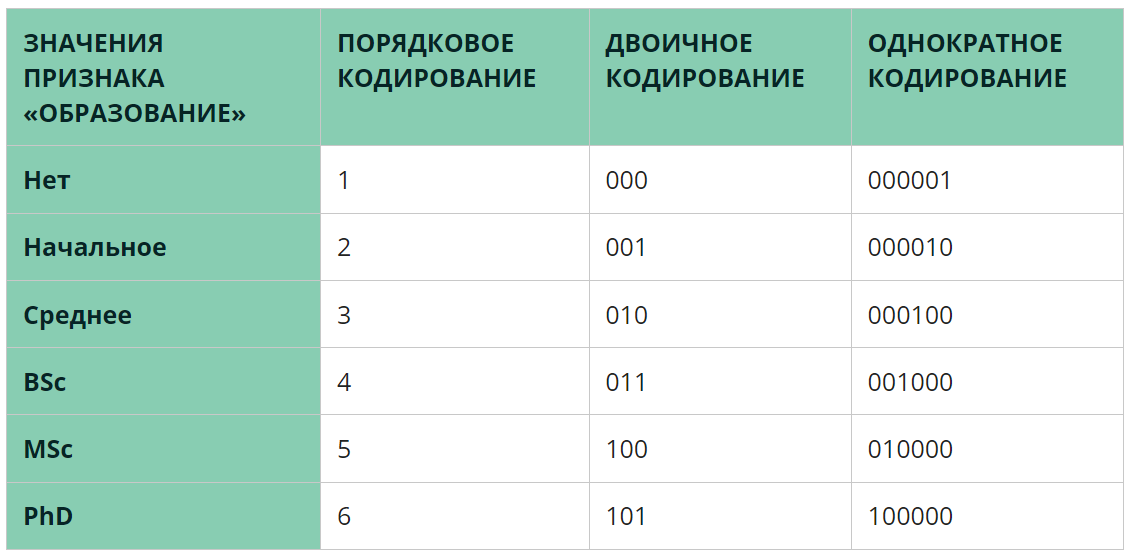

_______________________
Сторонний пример

In [ ]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

___________________________________

In [12]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


In [ ]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)